In [2]:
import pandas as pd
import geopandas
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import geopandas as gpd
import numpy as np

In [3]:
headers = ['userid', 'timecome','date','lat','long','count','timeleave','duration']
stay_07 = pd.read_csv('../../data/stay_points_07/2017-07-02.txt', names=headers)

In [4]:
stay_07_loc = stay_07[['lat', 'long']]
points = stay_07_loc.to_numpy()
points = points[0:1000]

In [6]:
houston_poi = pd.read_csv('../../data/houston_geo.csv')

In [12]:
poi_locations = houston_poi[['lat', 'lon']]
poi_centroids = poi_locations.to_numpy()

In [19]:
kmeans = KMeans(n_clusters=len(poi_centroids), 
                init=poi_centroids,
                random_state=0)

In [21]:
kmeans.fit(points)
klusters = kmeans.cluster_centers_

/home/caden/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/caden/anaconda3/envs/ai/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


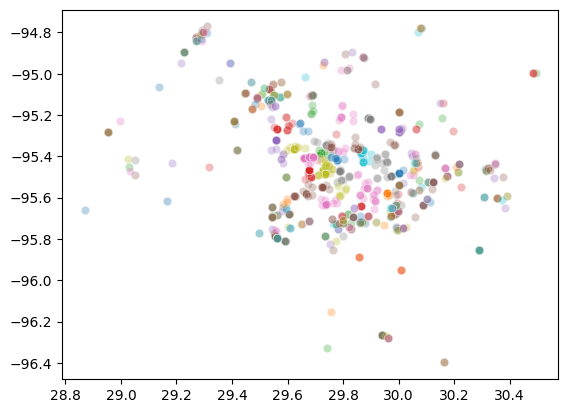

In [48]:
for kluster in range(len(klusters)):
    Xk = points[kmeans.labels_ == kluster]
    
    sns.scatterplot(x=Xk[:,0], y=Xk[:,1], alpha=0.3)

<Axes: >

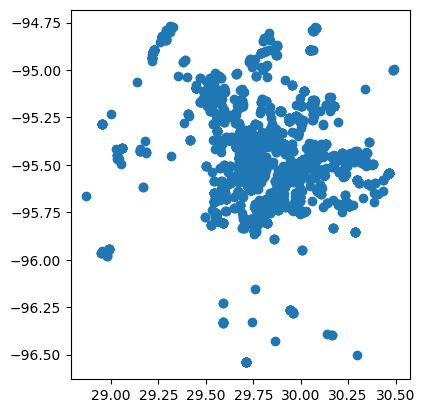

In [ ]:
geo_stay_07 = geopandas.GeoDataFrame(
    stay_07_loc, 
    geometry=geopandas.points_from_xy(stay_07_loc.lat, stay_07_loc.long), 
    crs="EPSG:4326")
geo_stay_07[0:2000].plot(aspect=1)